# Exploration

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split

In [2]:
## Getting data
df = pd.read_csv('data_science.csv')

In [3]:
## Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill'])

In [5]:
df.requirements = df.requirements.apply(clean)

In [29]:
df.skills = df.skills.apply(clean)

In [30]:
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((119, 13), (52, 13), (43, 13))

# Requirements vs. Degree

In [7]:
labels = pd.concat([train.label.value_counts(),
                    train.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
h,109,0.915966
b,10,0.084034


In [8]:
all_text = ' '.join(train.requirements)
b_text = ' '.join(train[train.label == 'b'].requirements)
h_text = ' '.join(train[train.label == 'h'].requirements)
all_text = clean(all_text)
b_text = clean(b_text)
h_text = clean(h_text)

In [9]:
pd.Series(all_text.split()).value_counts().head(20)

data           572
language       186
science        175
programming    173
learning       151
analytics      141
python         131
analysis       130
sql            126
degree         124
business       115
microsoft      113
machine        111
r               97
statistic       94
c               84
strong          83
engineering     82
field           77
knowledge       75
dtype: int64

In [10]:
all_freq = pd.Series(all_text.split()).value_counts()
b_freq = pd.Series(b_text.split()).value_counts()
h_freq = pd.Series(h_text.split()).value_counts()

In [11]:
word_counts = pd.concat([all_freq, b_freq, h_freq], sort=True, axis=1)
word_counts.columns = ['all', 'b', 'h']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [12]:
word_counts.sort_values(by='all', ascending=False)

,all,b,h
data,572,65,507
language,186,15,171
science,175,33,142
programming,173,17,156
learning,151,7,144
...,...,...,...
ides,1,0,1
identity,1,0,1
ideation,1,0,1
ideally,1,0,1


In [13]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])

,all,b,h,p_b,p_h
0,1,1,0,1.000000,0.000000
1,18,1,17,0.055556,0.944444
10,1,0,1,0.000000,1.000000
100,1,0,1,0.000000,1.000000
10sql,1,0,1,0.000000,1.000000
...,...,...,...,...,...
yearspython,1,0,1,0.000000,1.000000
youll,2,0,2,0.000000,1.000000
youre,2,1,1,0.500000,0.500000
youve,1,0,1,0.000000,1.000000


<AxesSubplot:>

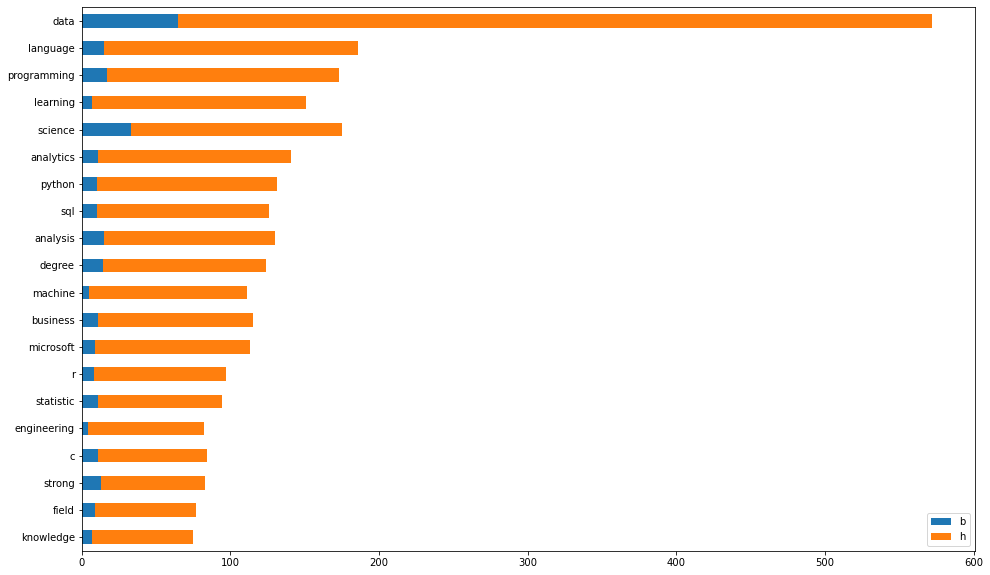

In [14]:
word_counts.assign(p_b=word_counts.b / word_counts['all'],p_h=word_counts.h / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['b', 'h']]\
    .sort_values(by='h')\
    .plot.barh(stacked=True, figsize = (16,10))

In [15]:
word_counts[(word_counts.b > 10) & (word_counts.h > 10)]\
    .assign(ratio=lambda df: df.b/df.h)\
    .sort_values(by='ratio')

,all,b,h,ratio
analytics,141,11,130,0.084615
language,186,15,171,0.087719
business,115,11,104,0.105769
programming,173,17,156,0.108974
degree,124,14,110,0.127273
data,572,65,507,0.128205
analysis,130,15,115,0.130435
statistic,94,11,83,0.132530
c,84,11,73,0.150685
strong,83,13,70,0.185714


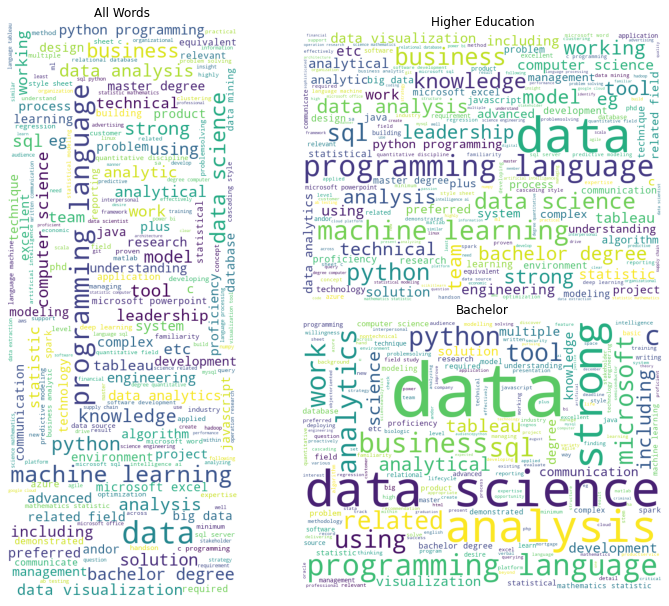

In [16]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
h_cloud = WordCloud(background_color='white', height=600, width=800).generate(h_text)
b_cloud = WordCloud(background_color='white', height=600, width=800).generate(b_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(h_cloud)
axs[2].imshow(b_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Higher Education')
axs[2].set_title('Bachelor')

for ax in axs: ax.axis('off')

### Bigrams

In [17]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(programming, language)    144
(machine, learning)        109
(data, science)             95
(data, analysis)            60
(computer, science)         53
(data, visualization)       44
(python, programming)       40
(data, analytics)           39
(r, programming)            36
(bachelor, degree)          36
(related, field)            35
(microsoft, excel)          28
(big, data)                 28
(microsoft, powerpoint)     24
(python, r)                 22
(master, degree)            22
(analytics, data)           22
(data, mining)              21
(r, python)                 21
(bachelor's, degree)        20
dtype: int64

#### Higher Education

In [18]:
top_20_h_bigrams = (pd.Series(nltk.ngrams(h_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_h_bigrams.head()

(programming, language)    131
(machine, learning)        104
(data, science)             76
(data, analysis)            54
(computer, science)         47
dtype: int64

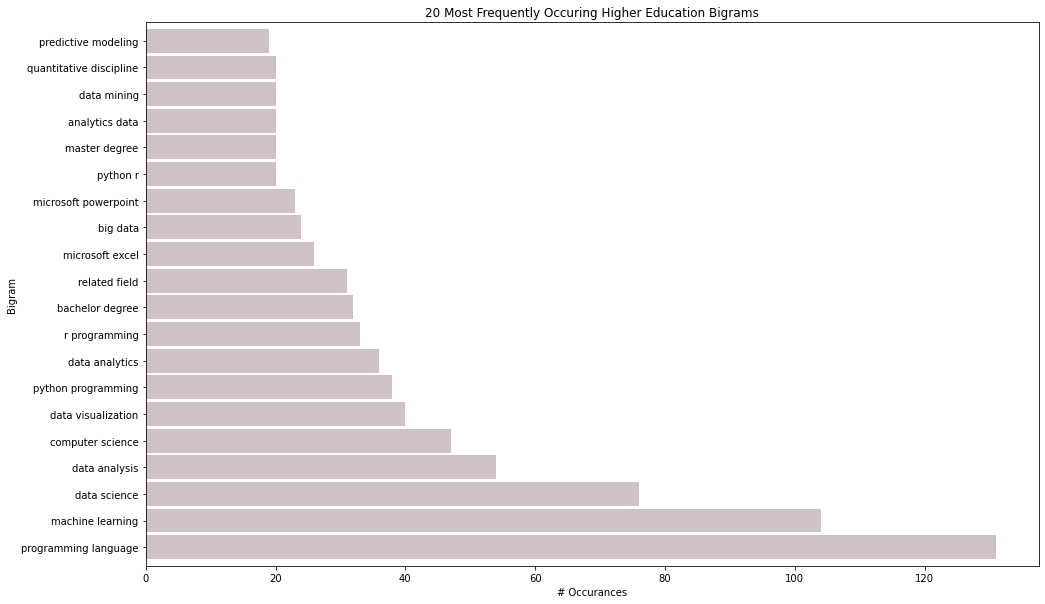

In [19]:
top_20_h_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Higher Education Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_h_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

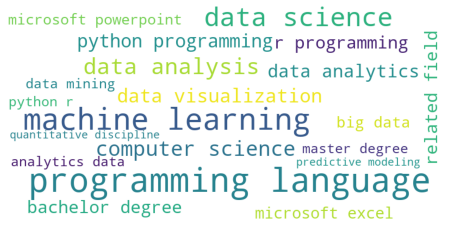

In [20]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_h_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [21]:
top_20_b_bigrams = (pd.Series(nltk.ngrams(b_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_b_bigrams.head()

(data, science)            19
(programming, language)    13
(computer, science)         6
(data, analysis)            6
(machine, learning)         5
dtype: int64

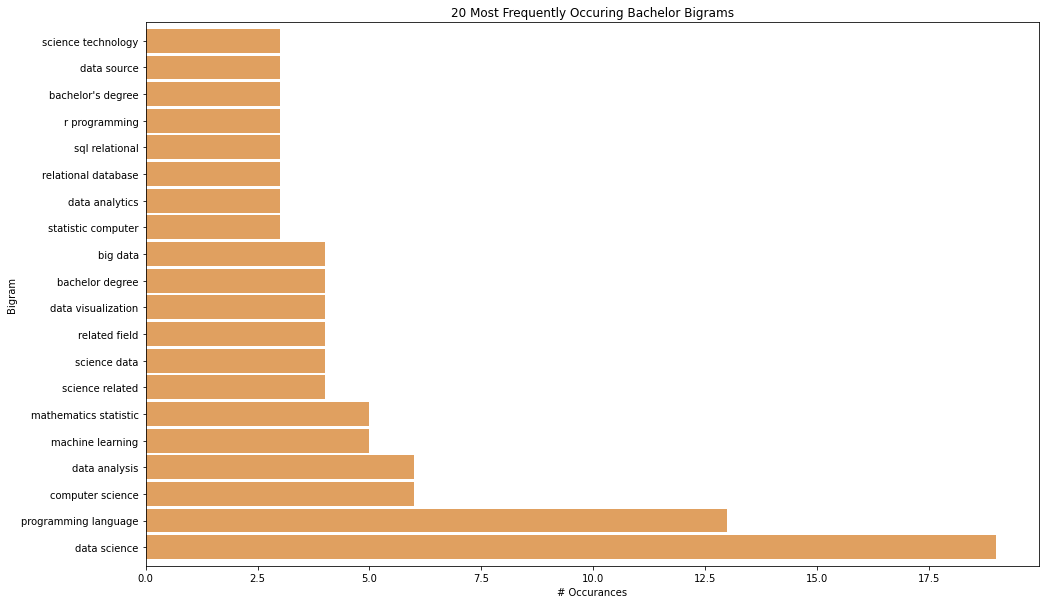

In [22]:
top_20_b_bigrams.sort_values(ascending=False).plot.barh(color='#E0A060', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Bachelor Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_b_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

***

## Role vs. Degree

In [23]:
df.role.value_counts()

Data Scientist          90
Data Analyst            60
Data Science Manager    32
Data Engineer           32
Name: role, dtype: int64

In [28]:
train.role.value_counts()

Data Scientist          49
Data Analyst            30
Data Engineer           20
Data Science Manager    20
Name: role, dtype: int64

In [26]:
train.groupby('role').label.value_counts()

role                  label
Data Analyst          h        25
                      b         5
Data Engineer         h        20
Data Science Manager  h        18
                      b         2
Data Scientist        h        46
                      b         3
Name: label, dtype: int64

<AxesSubplot:xlabel='role', ylabel='count'>

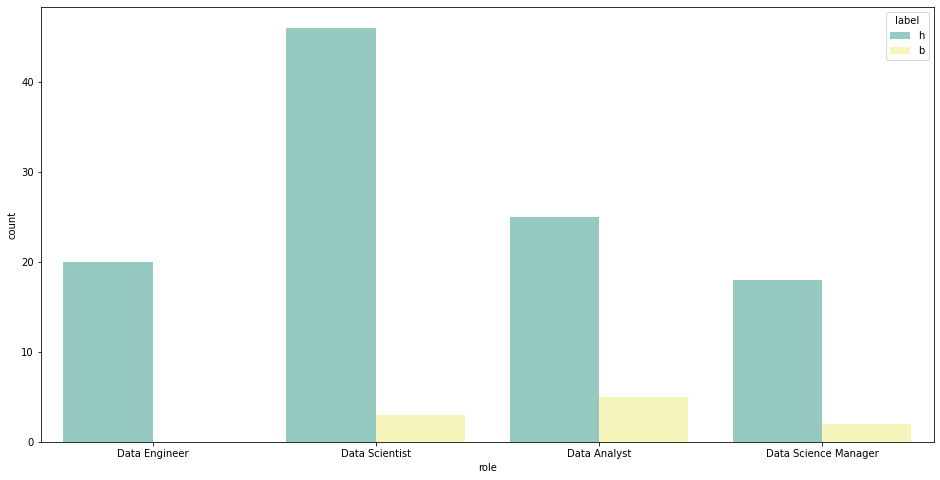

In [27]:
plt.figure(figsize = (16,8))
sns.countplot(x='role', hue='label', data=train, palette = 'Set3')

***

## Skills vs. Degree

In [35]:
# Separating skills into 3 Series: all, b, h
all_skills = ' '.join(train.skills)
b_skills = ' '.join(train[train.label == 'b'].skills)
h_skills = ' '.join(train[train.label == 'h'].skills)
all_skills = clean(all_skills)
b_skills = clean(b_skills)
h_skills = clean(h_skills)

In [37]:
pd.Series(all_text.split()).value_counts().head(20)

data           572
language       186
science        175
programming    173
learning       151
analytics      141
python         131
analysis       130
sql            126
degree         124
business       115
microsoft      113
machine        111
r               97
statistic       94
c               84
strong          83
engineering     82
field           77
knowledge       75
dtype: int64

In [38]:
all_skills_freq = pd.Series(all_skills.split()).value_counts()
b_skills_freq = pd.Series(b_skills.split()).value_counts()
h_skills_freq = pd.Series(h_skills.split()).value_counts()

In [41]:
skill_counts = pd.concat([all_skills_freq, b_skills_freq, h_skills_freq], sort=True, axis=1)
skill_counts.columns = ['all', 'b', 'h']
skill_counts = skill_counts.fillna(0).apply(lambda s: s.astype(int))

In [42]:
skill_counts.sort_values(by='all', ascending=False)

,all,b,h
language,133,11,122
programming,131,11,120
data,113,13,100
microsoft,103,5,98
sql,96,6,90
...,...,...,...
io,1,0,1
javase,1,1,0
javaserver,1,0,1
jmp,1,0,1


<AxesSubplot:>

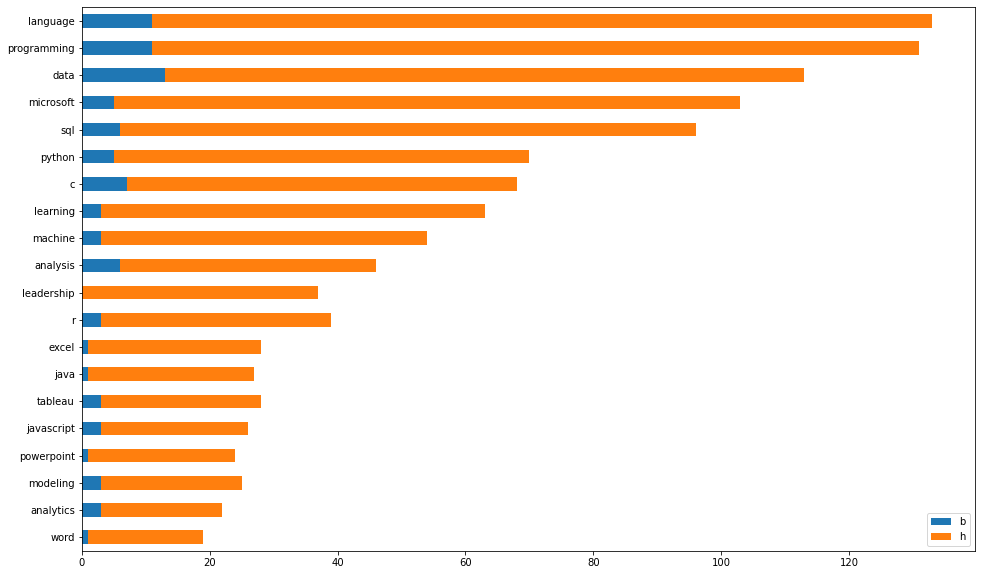

In [43]:
skill_counts.assign(p_b=skill_counts.b / skill_counts['all'],p_h=skill_counts.h / skill_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['b', 'h']]\
    .sort_values(by='h')\
    .plot.barh(stacked=True, figsize = (16,10))

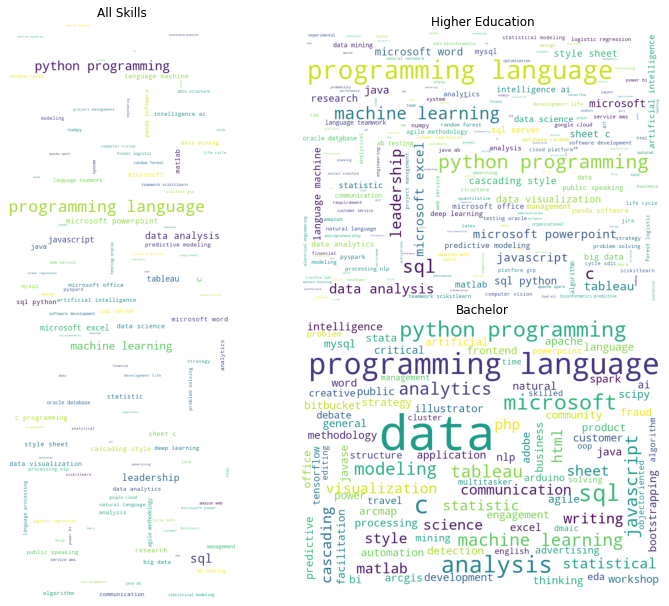

In [44]:
all_skills_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_skills)
h_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(h_skills)
b_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(b_skills)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_skills_cloud)
axs[1].imshow(h_skills_cloud)
axs[2].imshow(b_skills_cloud)

axs[0].set_title('All Skills')
axs[1].set_title('Higher Education')
axs[2].set_title('Bachelor')

for ax in axs: ax.axis('off')

### Bigrams

In [45]:
pd.Series(nltk.ngrams(all_skills.split(), 2)).value_counts().head(20)

(programming, language)       126
(python, programming)          68
(machine, learning)            53
(r, programming)               38
(data, analysis)               35
(microsoft, excel)             28
(microsoft, powerpoint)        24
(sql, python)                  19
(microsoft, word)              19
(c, programming)               19
(sheet, c)                     18
(cascading, style)             18
(style, sheet)                 18
(data, visualization)          18
(language, machine)            17
(data, science)                16
(sql, server)                  14
(intelligence, ai)             14
(artificial, intelligence)     14
(big, data)                    13
dtype: int64

#### Higher Education

In [46]:
top_20_h_skill_bigrams = (pd.Series(nltk.ngrams(h_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_h_skill_bigrams.head()

(programming, language)    116
(python, programming)       63
(machine, learning)         50
(r, programming)            35
(data, analysis)            31
dtype: int64

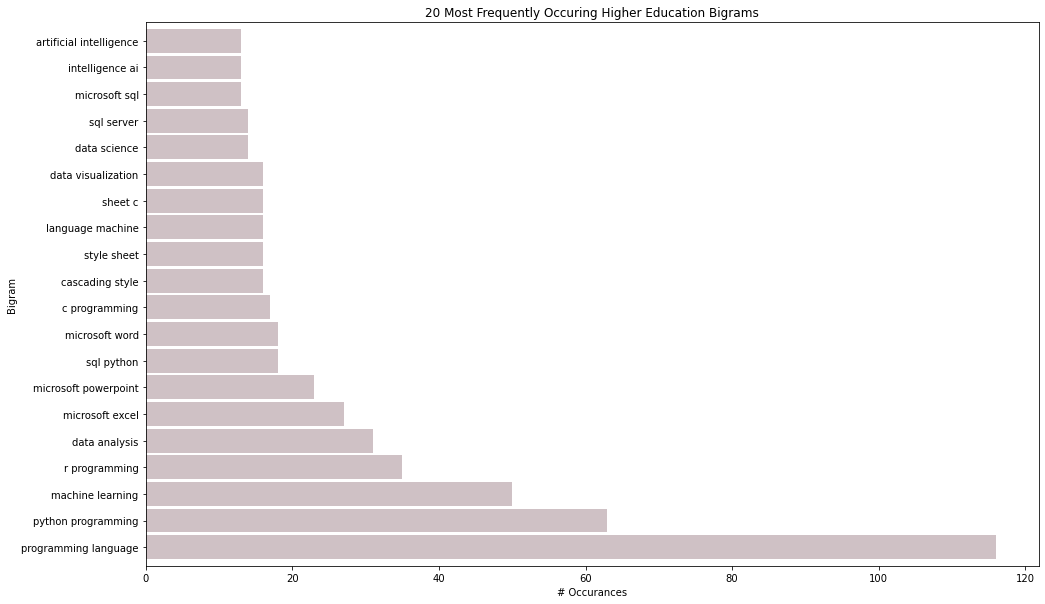

In [47]:
top_20_h_skill_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Higher Education Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_h_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

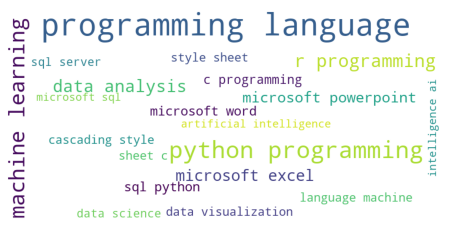

In [48]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_h_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [49]:
top_20_b_skill_bigrams = (pd.Series(nltk.ngrams(b_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_b_skill_bigrams.head()

(programming, language)    10
(python, programming)       5
(data, analysis)            4
(machine, learning)         3
(r, programming)            3
dtype: int64

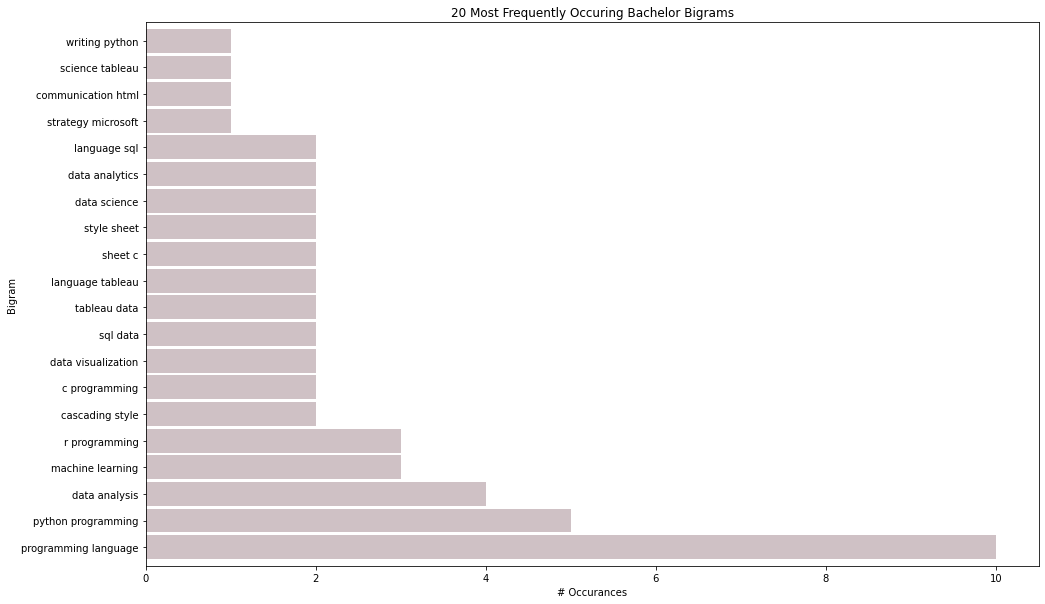

In [50]:
top_20_b_skill_bigrams.sort_values(ascending=False).plot.barh(color='#cfc1c5', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Bachelor Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_b_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

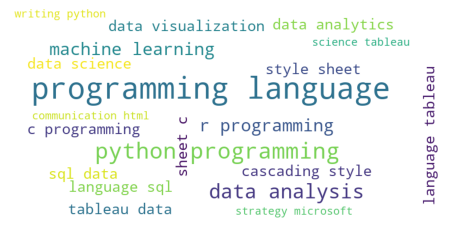

In [51]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_b_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()